Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for data visualization
from textblob import TextBlob # for sentiment analysis

In [58]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = '#00000000'

Loading the dataset & checking the dataset

In [59]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [60]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Data Profiling & Cleaning

In [61]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [62]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [63]:
netflix_df.isnull().sum().sum()

4307

Filling missing values

In [64]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating","duration"], inplace=True)

In [65]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

Exploratory Analysis and Visualization

-> Netflix content by type

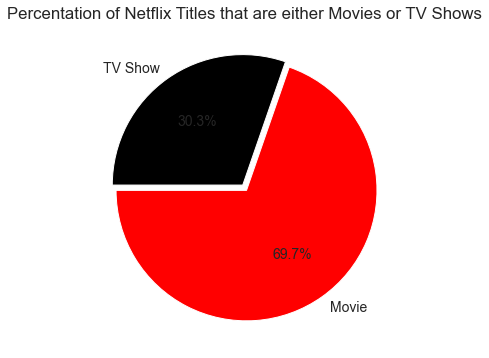

In [66]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red','black'],autopct='%1.1f%%', startangle=180)
plt.show()

-> Netflix content by type and release year

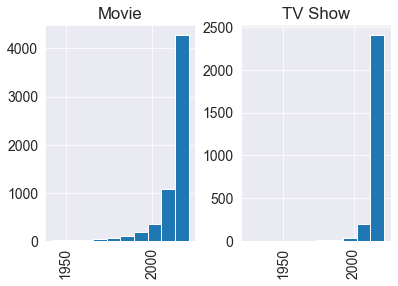

In [67]:
netflix_df.hist('release_year', 'type');

-> Netflix content by release year and duration

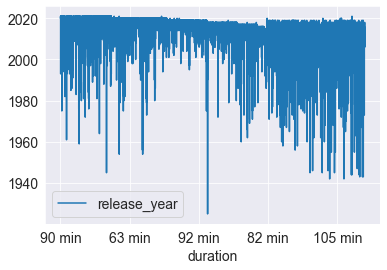

In [68]:
netflix_df.plot("duration", "release_year");

-> Amount of Content as a Function of Time

In [69]:
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year

<ipython-input-69-d81ab5476443>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

<ipython-input-69-d81ab5476443>:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

<ipython-input-69-d81ab5476443>:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [70]:
netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2020]

movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2020]

shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
shows_year_df = shows_year_df[shows_year_df != 2020]

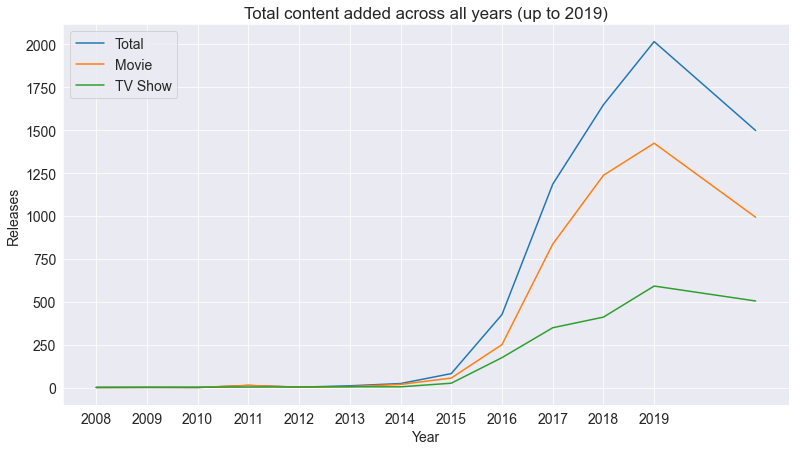

In [71]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added across all years (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

-> Countries by the Amount of the Produces Content

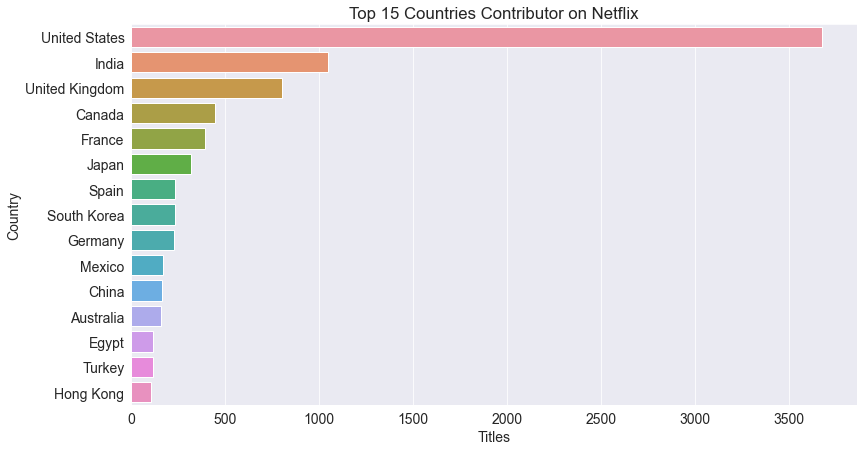

In [72]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()


In [73]:
netflix_df['country'].value_counts().sort_values(ascending=False)

United States                             2809
India                                      972
Country Unavailable                        829
United Kingdom                             418
Japan                                      243
                                          ... 
Peru, Germany, Norway                        1
United Kingdom, United States, Morocco       1
India, Iran                                  1
Germany, United States, Sweden               1
United States, Sweden, Norway                1
Name: country, Length: 749, dtype: int64

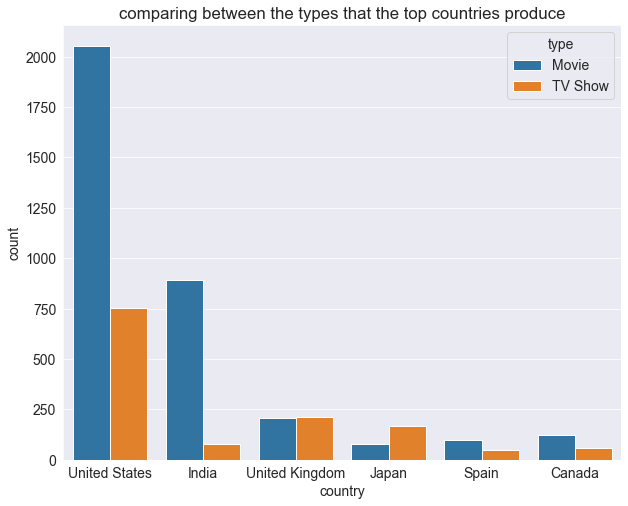

In [74]:
top_productive_countries=netflix_df[(netflix_df['country']=='United States')|(netflix_df['country']=='India')|(netflix_df['country']=='United Kingdom')|(netflix_df['country']=='Japan')|
                             (netflix_df['country']=='Canada')|(netflix_df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('comparing between the types that the top countries produce')
plt.show()

->  Top Directors on Netflix

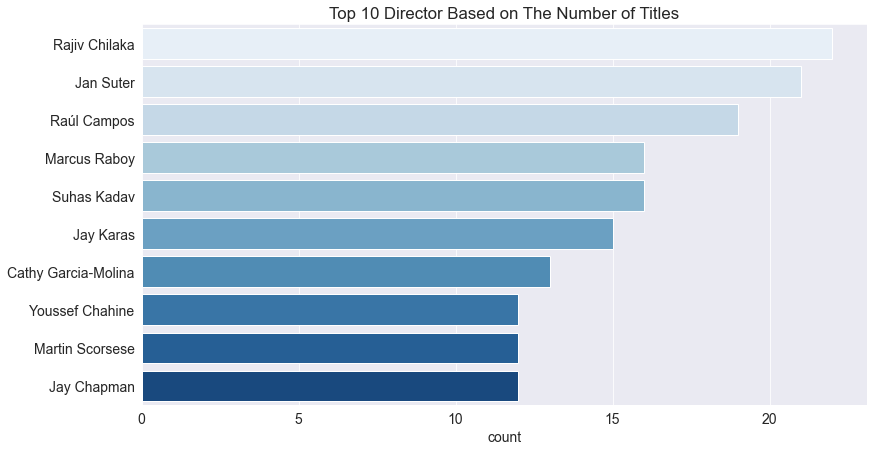

In [75]:
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

-> Top Genres on Netflix

In [76]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

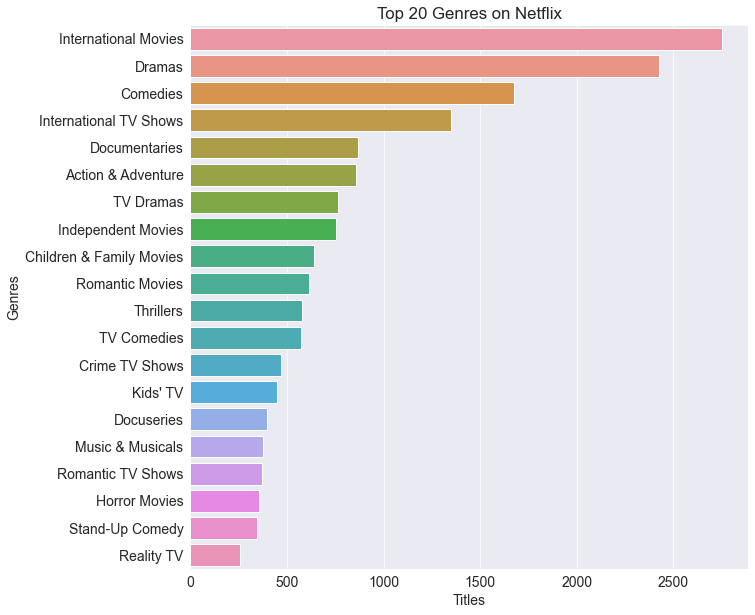

In [77]:
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

-> Amount of Content By Rating

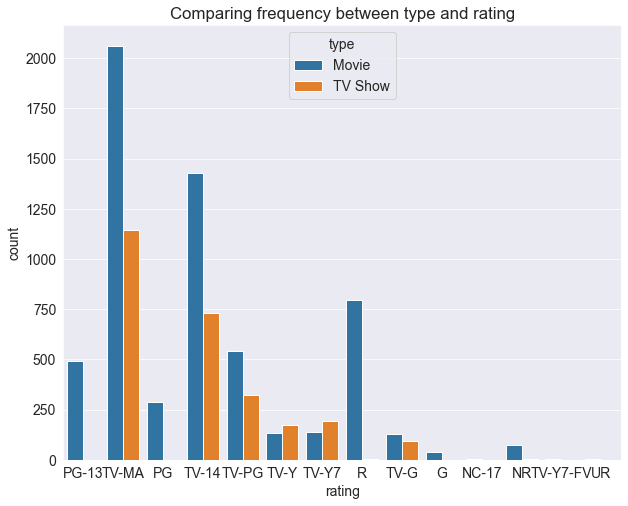

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix_df)
plt.title('Comparing frequency between type and rating')
plt.show()

-> Top Actor on Netflix based on the number of titles

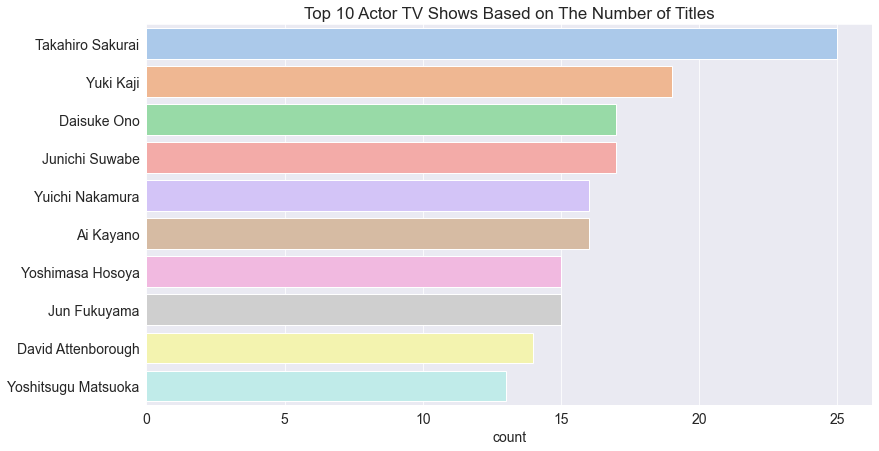

In [79]:
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

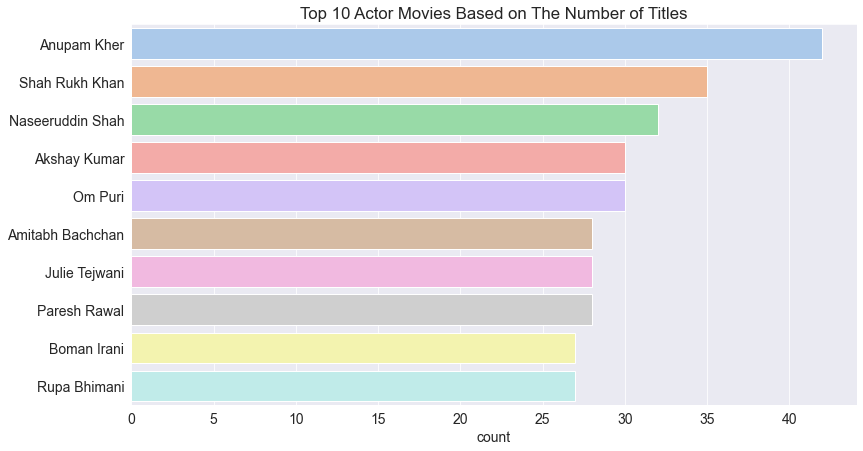

In [80]:
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

-> Analyze the sentiment of content on Netflix

In [81]:
dfx=netflix_df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

The above graph shows that the overall positive content is always greater than the neutral and negative content combined.

-> Netflix contnt by ratings and ages

In [82]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df["ratings_ages"]=netflix_df["rating"].replace(ratings_ages)

In [83]:
px.pie(netflix_df,names="ratings_ages",values=netflix_df.index)

In [84]:
movies=netflix_df[netflix_df["type"]=="Movie"]
tv=netflix_df[netflix_df["type"]=="TV Show"]

-> Type of content present in movies

In [85]:
px.pie(movies,names="ratings_ages",values=movies.index,title="Type of content present in movies")

-> Type of content present in Tv shows

In [86]:
px.pie(tv,names="ratings_ages",values=tv.index,title="Type of content present in Tv shows")

-> Length distribution of films

<ipython-input-87-8bc92a0c4d2f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DOYEL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



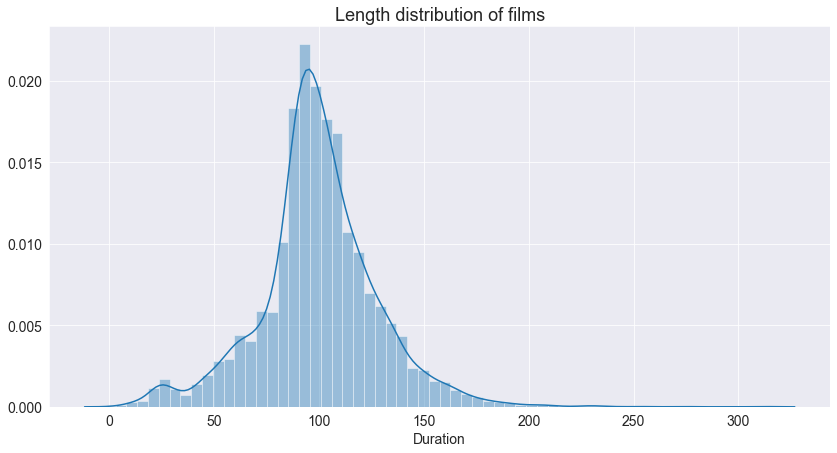

In [87]:
grp = netflix_df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]

plt.figure(figsize=(14, 7))

sns.distplot(movie['duration'], bins=60).set(ylabel=None)

plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

-> Release Frequency over Years

Text(0.5, 1.0, 'Release Frequency over Years')

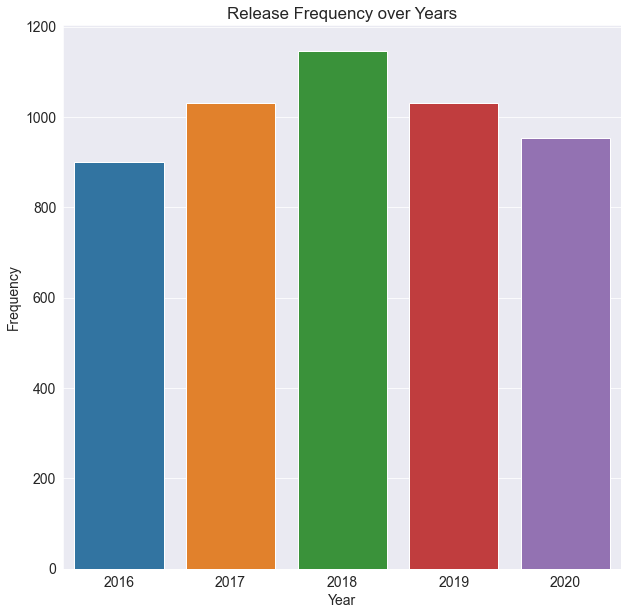

In [88]:
bar, ax = plt.subplots(figsize = (10,10))
sns.barplot(x = netflix_df['release_year'].value_counts().index[:5], y = netflix_df['release_year'].value_counts()[:5])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Release Frequency over Years')

-> Viewing the correlation between the features

In [89]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

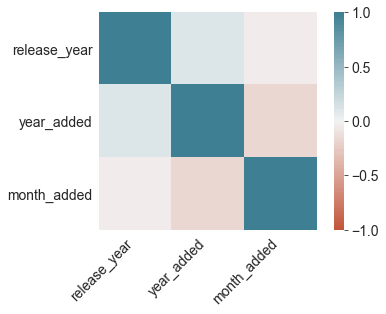

In [90]:
corr = netflix_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

Movie Recommendation

First we will try a simple Content Based Recommendor System which will recommend us movies/series which are similar to each other. To achieve this, we will compute pairwise cosine similarity scores for all movies/series based on their genre which is given by the listed_in feature and recommend movies/series based on that similarity score threshold.

Since the data in question is in Natural Language, we will have to compute the word vectors for the data and find the similarity between each vector. We will be using a built-in class called as Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each document. The TF-IDF score gives us the frequency of words occuring in a document which helps us evaluating the similarity between two documents.

In [91]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [93]:
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_df['listed_in'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(8790, 44)

In [94]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[40:44]

['talk', 'teen', 'thrillers', 'tv']

Now, we will use Cosine Similarity to find the similarity between two movies.

In [95]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(8790, 8790)

In [96]:
cosine_sim[1]

array([0.        , 1.        , 0.62099833, ..., 0.        , 0.        ,
       0.11398003])

In [97]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()
indices[:10]

title
Dick Johnson Is Dead                0
Blood & Water                       1
Ganglands                           2
Jailbirds New Orleans               3
Kota Factory                        4
Midnight Mass                       5
My Little Pony: A New Generation    6
Sankofa                             7
The Great British Baking Show       8
The Starling                        9
dtype: int64

In [98]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]

Now that the function is written, let's try to get recommendations for a similar movie/series title.

In [99]:
get_recommendations("Community")

160                                      Major Dad
323                                        30 Rock
520     I Think You Should Leave with Tim Robinson
662                                      Champions
677                                 Schitt's Creek
795                                  Happy Endings
862                                        Special
896                                    The Upshaws
1057                     Dad Stop Embarrassing Me!
Name: title, dtype: object

This system has given us some good recommendations based on the genre associated with the title but let us try to make it better. There is a high possibility that we would like a recommendation for a movie/series by the same actor or director or of similar genres. For the next model let's try to combine all of these features to make our recommendation algorithm better.

To combine these features together, we need to concatenate them together and create a soup feature. To do that we need to clean the data. Since we are considering the name of Actors and Directors, we need to make sure that actors with same names should not be considered the same. For example, John Travolta and John Krasinski are two separate actors, to resolve that we need to remove the space between them.

In [100]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''
        
# Apply clean_data function to your features.
features = ['cast', 'director', 'listed_in']

for feature in features:
    netflix_df[feature] = netflix_df[feature].apply(clean_data)

In the previous model, we used the TF-IDF, for this model we will use the CountVectorizer(). The difference between both these objects the inverse document factor(IDF). We do not want to down-weight any features that we are using for this analysis.

In [101]:
#Define a function to create a soup feature
def create_soup(x):
    return  ''.join(x['cast']) + ',' + ''.join(x['director'])  + ',' + ''.join(x['listed_in']) 

# Create a new soup feature
netflix_df['soup'] = netflix_df.apply(create_soup, axis=1)
netflix_df['soup']

0                     nocast,kirstenjohnson,documentaries
1       amaqamata,khosingema,gailmabalane,thabangmolab...
2       samibouajila,tracygotoas,samueljouy,nabihaakka...
3                  nocast,nodirector,docuseries,realitytv
4       mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...
                              ...                        
8802    markruffalo,jakegyllenhaal,robertdowneyjr.,ant...
8803    nocast,nodirector,kids'tv,koreantvshows,tvcome...
8804    jesseeisenberg,woodyharrelson,emmastone,abigai...
8805    timallen,courteneycox,chevychase,katemara,ryan...
8806    vickykaushal,sarah-janedias,raaghavchanana,man...
Name: soup, Length: 8790, dtype: object

In [102]:
#Define a Count Vectorizer Object. Remove all english stop words such as 'the', 'a'
count = CountVectorizer(stop_words='english')

In [103]:
count_matrix = count.fit_transform(netflix_df['soup'])
count_matrix.shape

(8790, 41822)

Next, we will use the cosine_similarity to measure the distance between the embeddings.

In [104]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [105]:
# Reset index of your main DataFrame and construct reverse mapping as before
netflix_df = netflix_df.reset_index()
indices = pd.Series(netflix_df.index, index=netflix_df['title'])

Let's try to get recommendations for a similar movie/series title using this model.

In [106]:
get_recommendations("Community", cosine_sim2 )

4771       The Joel McHale Show with Joel McHale
1314                            Chappelle's Show
3369                             BoJack Horseman
187            The Ingenuity of the Househusband
242                        Comedy Premium League
1439                      History of Swear Words
2524                            Magic for Humans
3898                                    Lunatics
4105    Larry Charles' Dangerous World of Comedy
Name: title, dtype: object